This notebook looks into various Python-based machine learning and datascience and data science libraries in an attemp to build a machine learning model and capable of classifying news as either real or fake based on their content.

The following approach will be used:

 1. Problem definition
 2. Data
 3. Evaluation
 4. Features
 5. Modelling
 6. Experimentation
 7. Deployment
 
 ## 1. Problem definition
 
    In a statement,
    Given the attributes(contents) of the news articles, can we predict whether the news is real or fake?
 
## 2. Data

    The original data came from kaggle.com ~
    https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset
    
    The data contains 2 csv files one for REAL NEWS and the other containing FAKE NEWS
    
## 3. Evaluation

    If we can reach 95% accuracy at predicting real and fake news during the proof of concept then the project can be pursued.
    
## 4. Features

    This is the data dictionary
    
    FAKE AND TRUE NEWS:
     1. Title
     2. Text
     3. Subject
     4. Date (Publication date)

In [1]:
# Regular EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Load data

In [2]:
real_news = pd.read_csv('True.csv')
fake_news = pd.read_csv('Fake.csv')

In [3]:
real_news.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [4]:
fake_news.head(10)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017"
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017"
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017"
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017"
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017"


### EDA - exploratory data analysis

In [5]:
real_news.info(), fake_news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB


(None, None)

In [10]:
real_news.isna().sum(), fake_news.isna().sum()

(title      0
 text       0
 subject    0
 date       0
 dtype: int64,
 title      0
 text       0
 subject    0
 date       0
 dtype: int64)

no missing data

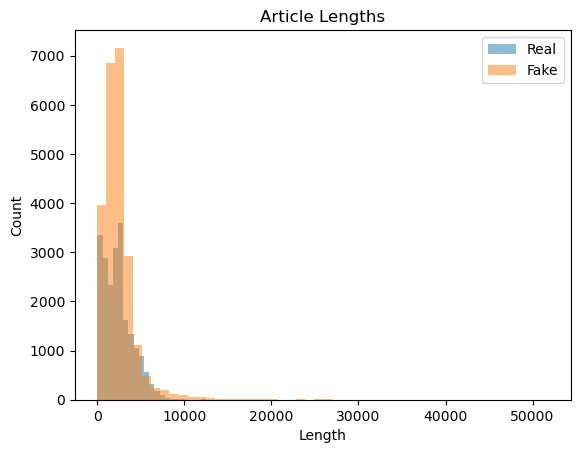

In [7]:
real_lengths = real_news['text'].apply(len)
fake_lengths = fake_news['text'].apply(len)

plt.hist(real_lengths, bins=50, alpha=0.5, label='Real')
plt.hist(fake_lengths, bins=50, alpha=0.5, label='Fake')
plt.title('Article Lengths')
plt.xlabel('Length')
plt.ylabel('Count')
plt.legend()
plt.show()

There is a big difference in the texts, some are below 10000 and others are close 40000

In [11]:
from collections import Counter
import nltk


In [13]:
#downloading stopwords and punkt(tokenization)
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [14]:
def get_most_common_words(texts, num_words=10):
    all_words = []
    for text in texts:
        all_words.extend(nltk.word_tokenize(text.lower()))
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word for word in all_words if word.isalpha() and word not in stop_words]
    word_counts = Counter(words)
    return word_counts.most_common(num_words)

real_words = get_most_common_words(real_news['text'])
fake_words = get_most_common_words(fake_news['text'])

print('Real News:', real_words)
print('Fake News:', fake_words)

Real News: [('said', 99037), ('trump', 54249), ('would', 31526), ('reuters', 28412), ('president', 26397), ('state', 19728), ('government', 18288), ('new', 16784), ('house', 16519), ('states', 16515)]
Fake News: [('trump', 74241), ('said', 31149), ('people', 26015), ('president', 25772), ('would', 23461), ('one', 22995), ('clinton', 18085), ('obama', 17920), ('like', 17660), ('donald', 17235)]


### Data Preprocessing

1. Lowercasing the text
1. Removing punctuation and digits
2. Removal of stopwords
3. Lemmatization

In [15]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
import string

nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()

    # Remove punctuation and digits
    text = text.translate(str.maketrans('', '', string.punctuation + string.digits))

    # Tokenize the text
    words = word_tokenize(text)

    # Remove stop words
    words = [word for word in words if word not in stop_words]

    # Stem or lemmatize the words
    words = [stemmer.stem(word) for word in words]
    
        # Join the words back into a string
    text = ' '.join(words)

    return text

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [16]:
real_news['text'] = real_news['text'].apply(preprocess_text)
fake_news['text'] = fake_news['text'].apply(preprocess_text)

### Model Training

#### Vectorization using CountVectorizer

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
import scipy.sparse as sp
import numpy as np

vectorizer = CountVectorizer()
X_real = vectorizer.fit_transform(real_news['text'])
X_fake = vectorizer.transform(fake_news['text'])

X = sp.vstack([X_real, X_fake])
y = np.concatenate([np.ones(X_real.shape[0]), np.zeros(X_fake.shape[0])])

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After splitting and performing feature extraction on our data we can build our machine learning model

we will test 4 machine learning models:

    1. Logistic Regression
    2. Multinomial Naive Bayes
    3. Decision Tree Classifier
    4. Passive Agressive Classifier
    

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import PassiveAggressiveClassifier

In [20]:
models = {
    "Logistic Rgeression": LogisticRegression(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Decision Tree Classifier": DecisionTreeClassifier(),
    "Passive Aggressive Classifier": PassiveAggressiveClassifier()
}

def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    fitting and evaluating machine learning models.
    models: a dictionary of different machine learning models
    X_train: training data with no labels
    X_test: testing data with no labels
    y_train: training labels
    y_test: testing labels
    """
    np.random.seed(42)
    model_scores = {} 
    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test) 
    
    return model_scores

In [21]:
model_scores = fit_and_score(models=models,
                            X_train=X_train,
                            X_test=X_test,
                            y_train=y_train,
                            y_test=y_test)

model_scores

C:\Users\USER\desktop\programminglanguages\first_nlp\env\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Rgeression': 0.994988864142539,
 'Multinomial Naive Bayes': 0.9422048997772828,
 'Decision Tree Classifier': 0.9956570155902005,
 'Passive Aggressive Classifier': 0.9896436525612472}

Decision tree classifier performs best: 99.56570155902005%

### Model Comparison


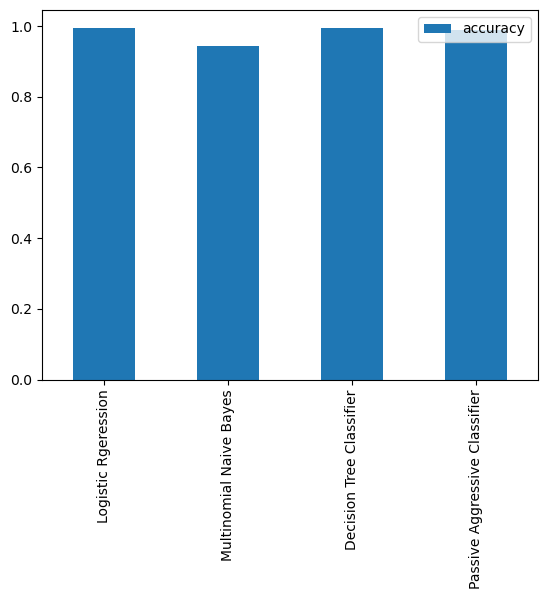

In [22]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();   

We have our baseline model, our next steps will be:

    1. Hyperparameter tuning
    2. Feature importance
    3. Confusion matrix
    4. Cross-validation
    5. Precision
    6. Recall
    7. F1 score
    8. Classification
    9. ROC curve
    10. AUC

### Hyperparameter tuning using GridSearchCV

In [25]:
from sklearn.model_selection import GridSearchCV

In [24]:
DecisionTreeClassifier().get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [28]:
# trying out GridSearchCV on DecisionTreeClassifier()
np.random.seed(42)

gs_decision_cf_grid = {
    'criterion':['gini','entropy'],
    'max_depth':range(1, 5),
    'min_samples_split':range(1, 5),
    'min_samples_leaf':range(1, 5)
}

gs_decision_cf = GridSearchCV(DecisionTreeClassifier(),
                              param_grid=gs_decision_cf_grid,
                              scoring='accuracy',
                              refit='accuracy',
                              n_jobs=-1,
                              cv=5,
                              verbose=True)
gs_decision_cf.fit(X_train, y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


C:\Users\USER\desktop\programminglanguages\first_nlp\env\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\USER\desktop\programminglanguages\first_nlp\env\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\USER\desktop\programminglanguages\first_nlp\env\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\USER\desktop\programminglanguages\first_nlp\env\lib\site-packages\skle

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 5),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 5)},
             refit='accuracy', scoring='accuracy', verbose=True)

In [29]:
gs_decision_cf.score(X_train, y_train)

0.995517567793307

In [ ]:
# trying out GridSearchCV on LogisticRegression
np.random.seed(42)
# Using different grid hyperameters for LogisticRegression()
gs_log_reg_grid = {'penalty': ['l1', 'l2'],
                   'C': [0.1, 1, 10, 100],
                   'solver': ['liblinear', 'saga']
                  }

gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=gs_log_reg_grid,
                          scoring="accuracy",
                          refit="accuracy",
                          n_jobs=-1,
                          cv=5,
                          verbose=True)
gs_log_reg.fit(X_train, y_train)

In [33]:
gs_log_reg.score(X_test, y_test)

0.9951002227171493

In [34]:
gs_decision_cf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [76]:
gs_log_reg.best_params_

{'C': 10000.0, 'solver': 'liblinear'}

Evaluating our tuned machine learning classifier, beyond accuracy

    1. ROC curve and AUC score
    2. Confusion matrix
    3. Classification report
    4. Precision
    5. Recall
    6. F1-score

making predictions

In [39]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

In [35]:
# making predictions with tuned model
y_preds = gs_decision_cf.predict(X_test)

In [36]:
y_preds

array([0., 0., 0., ..., 0., 1., 1.])

In [37]:
y_test

array([0., 0., 0., ..., 0., 1., 1.])

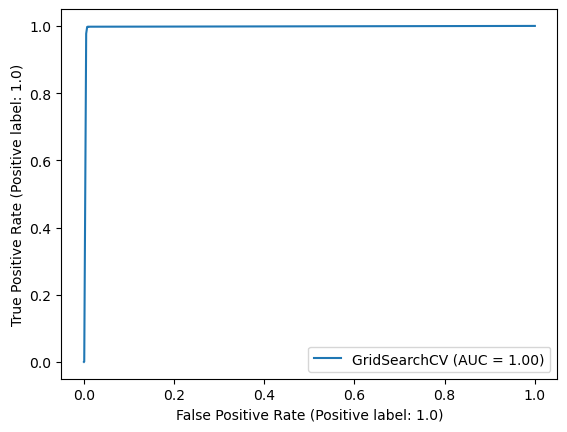

In [40]:
# plot ROC curve and evaluate and calculate AUC metric
RocCurveDisplay.from_estimator(gs_decision_cf, X_test, y_test);

In [41]:
# confusion matrix
print(confusion_matrix(y_test, y_preds))

[[4617   33]
 [  13 4317]]


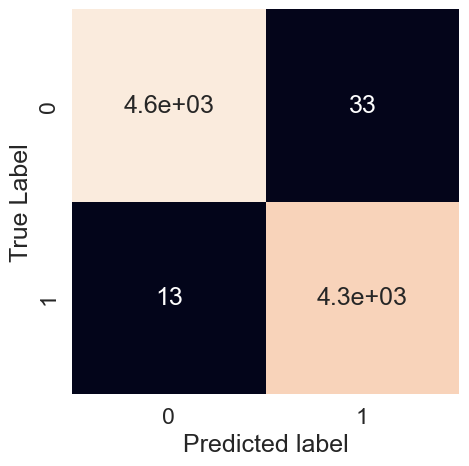

In [43]:
# Visualize confusion matrix
sns.set(font_scale=1.5)

def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig, ax = plt.subplots(figsize=(5, 5))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                    annot=True,
                    cbar=False)
    plt.xlabel("Predicted label")
    plt.ylabel("True Label")
    
plot_conf_mat(y_test, y_preds)

A Classification Report

In [44]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00      4650
         1.0       0.99      1.00      0.99      4330

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980



Calculate evaluation metrics using cross-validation
we'll calculate accuracy, precision, recall and F1-score of our model using cross-validation and to do so we'll be using cross_val_score

In [66]:
from sklearn.model_selection import cross_val_score

In [45]:
# Check best hyperparameters
gs_decision_cf.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [73]:
# create a new classifier with the best parameters
clf = DecisionTreeClassifier(criterion='entropy',
                             max_depth=4,
                             min_samples_split=2,
                             min_samples_leaf=1
                            )

In [74]:
# Cross-validated accuracy, precision, recall, f1-score
cv_metrics = {"accuracy": "accuracy", "precision": "precision", "recall": "recall", "f1": "f1"}

def cross_val_scores(cv_metrics):
    metric_evaluation = {}
    
    for name, cv_metric in cv_metrics.items():
        metric_evaluation[name] = np.mean(cross_val_score(clf,
                                           X,
                                           y,
                                           cv=5,
                                           scoring=cv_metric))
     
    return metric_evaluation

In [75]:
metric_evaluation = cross_val_scores(cv_metrics=cv_metrics)
metric_evaluation

{'accuracy': 0.9934516991019133,
 'precision': 0.9891545779995262,
 'recall': 0.9973385213685443,
 'f1': 0.9932190476848156}

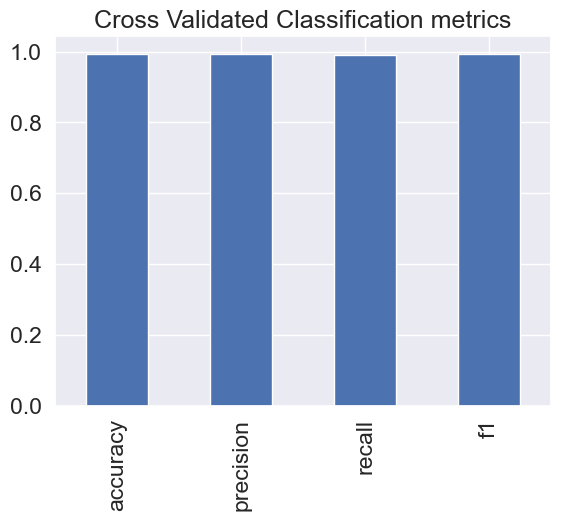

In [80]:
# Visualizing our cross_validation_metrics
cv_df = pd.DataFrame(metric_evaluation, index=[0])
cv_df.T.plot.bar(title="Cross Validated Classification metrics",
                 legend=False);